In [1]:
import pandas as pd
import numpy as np

In [ ]:
import pandas as pd

def load_dataset(prefix, folder_name):

    # Load the dataset as a pandas DataFrame
    X = pd.read_csv(prefix + 'X_' + folder_name + '.txt', delim_whitespace=True, header=None)
    y = pd.read_csv(prefix + 'y_' + folder_name + '.txt', delim_whitespace=True, header=None)
    subjects = pd.read_csv(prefix + 'subject_' + folder_name + '.txt', delim_whitespace=True, header=None)

    # Combine X, y, and subjects into one DataFrame
    data = pd.concat([X, y, subjects], axis=1)
    
    return data

# Now call the function with the modified code
features = pd.read_csv('../UCI HAR Dataset/features.txt', delim_whitespace=True, header=None)[1].tolist()
train_df = load_dataset('../UCI HAR Dataset/train/', "train")
test_df = load_dataset('../UCI HAR Dataset/test/', "test")
train_df.columns = features + ['Activity', 'Subject']
test_df.columns = features + ['Activity', 'Subject']
import pandas as pd

def load_dataset(prefix, folder_name):

    # Load the dataset as a pandas DataFrame
    X = pd.read_csv(prefix + 'X_' + folder_name + '.txt', delim_whitespace=True, header=None)
    y = pd.read_csv(prefix + 'y_' + folder_name + '.txt', delim_whitespace=True, header=None)
    subjects = pd.read_csv(prefix + 'subject_' + folder_name + '.txt', delim_whitespace=True, header=None)

    # Combine X, y, and subjects into one DataFrame
    data = pd.concat([X, y, subjects], axis=1)
    
    return data

# Now call the function with the modified code
features = pd.read_csv('../UCI HAR Dataset/features.txt', delim_whitespace=True, header=None)[1].tolist()
train_df = load_dataset('../UCI HAR Dataset/train/', "train")
test_df = load_dataset('../UCI HAR Dataset/test/', "test")
train_df.columns = features + ['Activity', 'Subject']
test_df.columns = features + ['Activity', 'Subject']

data = pd.concat([train_df, test_df])
data.to_csv('../UCI HAR Dataset/combined_data.csv')

In [2]:
data = pd.read_csv('../UCI HAR Dataset/combined_data.csv')

In [3]:
data.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",activity,subject
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,5,1
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,5,1
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,5,1
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,5,1
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,5,1


In [25]:
from sklearn.model_selection import train_test_split

X = data.drop(['activity', 'subject'], axis=1)
y = data['activity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [26]:
n_timesteps = 1 
n_features = X_train.shape[1]

In [27]:
# Reshape X_train and X_test to add a timestep dimension
X_train_reshaped = X_train.values.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test_reshaped = X_test.values.reshape((X_test.shape[0], 1, X_test.shape[1]))


In [28]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse=False)

y_train_encoded = encoder.fit_transform(np.array(y_train).reshape(-1, 1))
y_test_encoded = encoder.transform(np.array(y_test).reshape(-1, 1))


/Users/sangeetha/opt/anaconda3/envs/dsan6600/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [29]:
n_outputs = y_train_encoded.shape[1]


In [30]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

def create_model(lstm_units=50, dropout_rate=0.2, optimizer='adam'):
    model = Sequential()
    model.add(LSTM(lstm_units, input_shape=(n_timesteps, n_features)))
    model.add(Dropout(dropout_rate))
    model.add(Dense(n_outputs, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model


In [31]:
param_grid = {
    'lstm_units': [50, 100, 150],
    'dropout_rate': [0.2, 0.3, 0.4],
    'optimizer': ['adam', 'rmsprop']
}


In [ ]:
from sklearn.model_selection import GridSearchCV

model = KerasClassifier(build_fn=create_model, epochs=10, batch_size=512, verbose=0)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=1, cv=3)
grid_result = grid.fit(X_train_reshaped, y_train_encoded)


In [34]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))


Best: 0.952906 using {'dropout_rate': 0.3, 'lstm_units': 150, 'optimizer': 'adam'}


In [35]:
#training the final model with best params

model = create_model(lstm_units=150, dropout_rate=0.3, optimizer='adam')

2023-11-30 19:45:10.029355: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-11-30 19:45:10.034158: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-11-30 19:45:10.035190: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

In [39]:
model.fit(X_train_reshaped, y_train_encoded, epochs=30, batch_size=512, verbose=1)

Epoch 1/30
17/17 [==============================] - 5s 170ms/step - loss: 0.1095 - accuracy: 0.9654
Epoch 2/30
17/17 [==============================] - 2s 88ms/step - loss: 0.1102 - accuracy: 0.9599
Epoch 3/30
17/17 [==============================] - 1s 82ms/step - loss: 0.1000 - accuracy: 0.9648
Epoch 4/30
17/17 [==============================] - 1s 70ms/step - loss: 0.1001 - accuracy: 0.9632
Epoch 5/30
17/17 [==============================] - 1s 71ms/step - loss: 0.0982 - accuracy: 0.9649
Epoch 6/30
17/17 [==============================] - 1s 69ms/step - loss: 0.0883 - accuracy: 0.9694
Epoch 7/30
17/17 [==============================] - 1s 82ms/step - loss: 0.0822 - accuracy: 0.9727
Epoch 8/30
17/17 [==============================] - 1s 73ms/step - loss: 0.1048 - accuracy: 0.9603
Epoch 9/30
17/17 [==============================] - 1s 80ms/step - loss: 0.0791 - accuracy: 0.9711
Epoch 10/30
17/17 [==============================] - 1s 84ms/step - loss: 0.0675 - accuracy: 0.9772
Epoch 11

In [38]:
test_loss, test_accuracy = model.evaluate(X_test_reshaped, y_test_encoded)
print(f'Test Accuracy: {test_accuracy*100}')


2023-11-30 19:46:33.518198: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-11-30 19:46:33.531363: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-11-30 19:46:33.532271: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

65/65 [==============================] - 10s 81ms/step - loss: 0.1118 - accuracy: 0.9660
Test Accuracy: 96.60193920135498


In [40]:
history = model.history

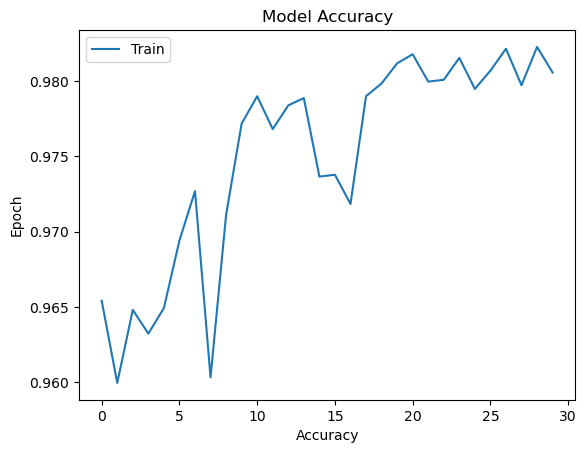

In [42]:
#plot the training and validation accuracy

import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')
plt.show()


65/65 [==============================] - 0s 5ms/step


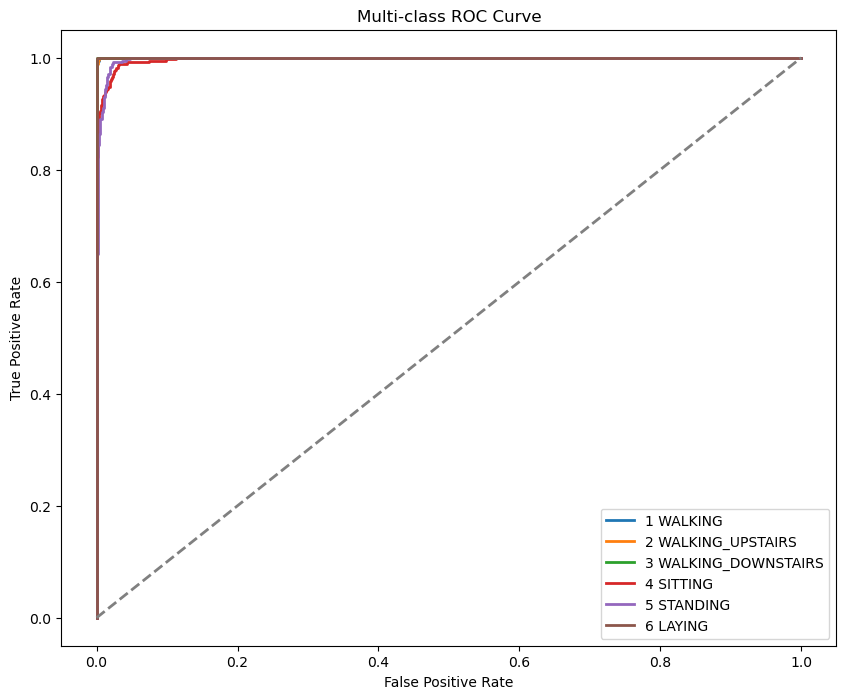

In [50]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

# Ensure you have your test data: X_test_reshaped, y_test
# y_test should be the true class labels

# Predict the probabilities for each class
y_score = model.predict(X_test_reshaped)

# Binarize the test labels
n_classes = y_train_encoded.shape[1]  # Assuming y_train_encoded is one-hot encoded
y_test_binarized = label_binarize(y_test, classes=np.arange(n_classes))

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plotting
plt.figure(figsize=(10, 8))
activity_labels = ['1 WALKING', '2 WALKING_UPSTAIRS', '3 WALKING_DOWNSTAIRS', 
                   '4 SITTING', '5 STANDING', '6 LAYING']
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=2, label=f'{activity_labels[i]}')

plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-class ROC Curve')
plt.legend(loc="lower right")
plt.show()
